# Operation Pigeon: The Best neighborhood in Pittsburgh for a pigeon

What is the best neighbourhood for a pigeon to live in?

In our opinion:
1. The biggest one. More space, more garbage to pick at.
2. The mot populous one. More people, more garbage
3. The one wiht the highest traffic. More traffic, more people, more garbage..
4. And finally, the one with the most public Wifi. (whaat?)

## Metric 1: The biggest and most populous neighborhood
#### Balazs Kudelasz - bak97

To determine the biggest and most populous neighborhood, i will use two datasets:
* Neighborhoods
* Pittsburgh SNAP Census Data

First, let's load the tools we need, and the first data file, the Neighborhoods. Then, lets look at the first line just to make sure it loads.

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
biggest_hood = pd.read_csv("neighborhoods.csv")
biggest_hood.head(1)

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_number,plannerassign,globalid,created_user,created_date,last_edited_user,last_edited_date,temp,shape_area,shape_length
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,15,Ose Akinlotan,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,SDE,2020-08-14T12:57:28,SDE,2020-08-14T13:02:13,NaN,8.153647e+06,14047.065024


Let's strip out the data we dont need. To decide what we need, let's look at all the column names. In this example, with a for loop.

In [2]:
for col in biggest_hood.columns:
    print(col)

objectid
fid_blockg
statefp10
countyfp10
tractce10
blkgrpce10
geoid10
namelsad10
mtfcc10
funcstat10
aland10
awater10
intptlat10
intptlon10
shape_leng
fid_neighb
pghdb_sde_neighborhood_2010_area
perimeter
neighbor
neighbor_i
hood
hood_no
acres
sqmiles
dpwdiv
unique_id
sectors
shape_le_1
shape_ar_1
page_number
plannerassign
globalid
created_user
created_date
last_edited_user
last_edited_date
temp
shape_area
shape_length


The data we are interested in is the "hood" and the "acres" colums. So lets filter these out, and look at the first 5 entries.

In [17]:
biggest_hood.loc[:,["hood","acres"]].head(5)

,hood,acres
0,Point Breeze North,183.781
1,Squirrel Hill North,785.948
2,Garfield,294.077
3,Bedford Dwellings,115.252
4,Knoxville,193.982


We only need the top 5, so let's sort it, descending, then slice the rest of the rows out.

In [6]:
biggest_hood.loc[:,["hood","acres"]].sort_values(by=["acres"], ascending=False).head(5)

,hood,acres
80,Squirrel Hill South,1717.485
24,Brookline,1338.669
25,Hays,1125.478
51,Carrick,1075.670
60,Hazelwood,1017.805


Save the results into a mask, so we can visualize it better.

In [17]:
hood_acres=hoods.loc[:,["hood","acres"]].sort_values(by=["acres"], ascending=False).head(5)
hood_acres

,hood,acres
80,Squirrel Hill South,1717.485
24,Brookline,1338.669
25,Hays,1125.478
51,Carrick,1075.670
60,Hazelwood,1017.805


A bar chart will be perfect for this.

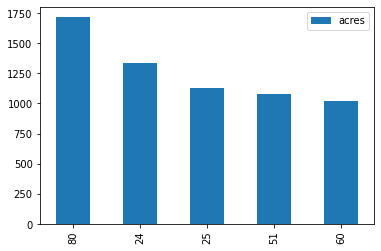

In [61]:
hood_acres.plot(kind='bar')

After a little tailoring, we have a pretty chart!

Text(0, 0.5, 'Size in acres')

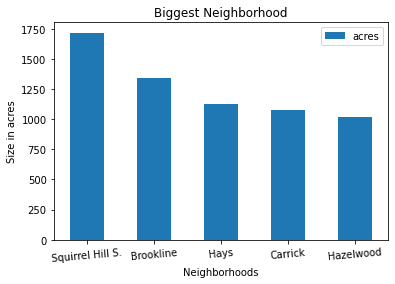

In [20]:
plotdata =pd.DataFrame({"acres":[1717.485, 1338.669, 1125.478, 1075.670, 1017.805]}, index=["Squirrel Hill S.", "Brookline", "Hays", "Carrick", "Hazelwood"])
plotdata.plot.bar(rot=5)
plt.title("Biggest Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Size in acres")

Next, let's repeat the same steps to find the most populous neighbourhood. 

In [9]:
populous_hood = pd.read_csv("census.csv")
populous_hood.head(5)

,Neighborhood,Sector #,Population (2010),Miles of Major Roads,Total Street Miles,Street Density (st. mi/area sq. mi),# Sets of Steps,# Step Treads,Res. Permit Parking Area(s),Total Working Pop. (Age 16+) (2010),Commute to Work: Drive Alone (2010),Commute to Work: Carpool/Vanpool (2010),Commute to Work: Public Transportation (2010),Commute to Work: Taxi (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010),Work at Home (2010)
0,Allegheny Center,3,933,2.232425,4.141467,19.721273,0,0,None,386,0.277202,0.098446,0.168394,0.000000,0.000000,0.0,0.437824,0.000000,0.018135
1,Allegheny West,3,462,1.471627,4.870843,34.544983,0,0,G,151,0.231788,0.205298,0.158940,0.145695,0.000000,0.0,0.258278,0.000000,0.000000
2,Allentown,6,2500,1.648451,12.325689,41.781996,12,474,None,824,0.469660,0.109223,0.379854,0.000000,0.008495,0.0,0.000000,0.014563,0.018204
3,Arlington,7,1869,0.861571,10.734269,22.838871,13,428,None,673,0.739970,0.072808,0.135215,0.000000,0.000000,0.0,0.019316,0.008915,0.023774
4,Arlington Heights,7,244,0.000000,1.086460,8.230760,0,0,None,72,0.111111,0.000000,0.888889,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


Let's look at the columns, this time, the easier way.

In [10]:
populous_hood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Neighborhood                                   90 non-null     object 
 1   Sector #                                       90 non-null     int64  
 2   Population (2010)                              90 non-null     int64  
 3   Miles of Major Roads                           90 non-null     float64
 4   Total Street Miles                             90 non-null     float64
 5   Street Density (st. mi/area sq. mi)            90 non-null     float64
 6   # Sets of Steps                                90 non-null     int64  
 7   # Step Treads                                  90 non-null     int64  
 8   Res. Permit Parking Area(s)                    90 non-null     object 
 9   Total Working Pop. (Age 16+) (2010)            90 non-nu

The data we are interested in is the "Neighborhood" and the "Population (2010)" colums. So lets filter these out, and look at the first 5 entries.

In [55]:
populous_hood.loc[:,["Neighborhood","Population (2010)"]].head(5)

,Neighborhood,Population (2010)
0,Allegheny Center,933
1,Allegheny West,462
2,Allentown,2500
3,Arlington,1869
4,Arlington Heights,244


MAsk it, sort it, slice it.

In [11]:
most_populous_hood=populous_hood.loc[:,["Neighborhood","Population (2010)"]].sort_values(by=["Population (2010)"], ascending=False).head(5)
most_populous_hood

,Neighborhood,Population (2010)
76,Squirrel Hill South,15110
67,Shadyside,13915
13,Brookline,13214
75,Squirrel Hill North,11363
55,North Oakland,10551


Visualize it!

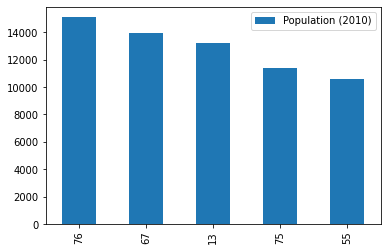

In [12]:
most_populous_hood.plot(kind='bar')

Make it pretty.

Text(0, 0.5, 'Population')

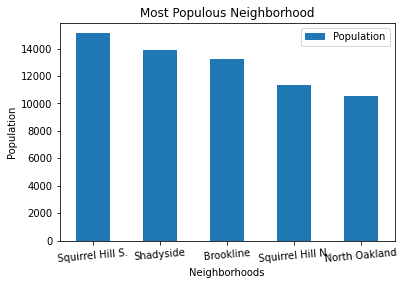

In [14]:
plotdata2 =pd.DataFrame({"Population":[15110,13915,13214,11363,10551]}, index=["Squirrel Hill S.", "Shadyside", "Brookline", "Squirrel Hill N.", "North Oakland"])
plotdata2.plot.bar(rot=5)
plt.title("Most Populous Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Population")

Let'shave a look at the results. The biggest neighborhood is:

In [15]:
plotdata

,acres
Squirrel Hill S.,1717.485
Brookline,1338.669
Hays,1125.478
Carrick,1075.670
Hazelwood,1017.805


The most populous neighborhood is:

In [16]:
plotdata2

,Population
Squirrel Hill S.,15110
Shadyside,13915
Brookline,13214
Squirrel Hill N.,11363
North Oakland,10551


#### Conclusion:
We can see that the biggest and the most populous neighborhood is Squirrel Hill, so far, the best palce for a Pittsburg pigeon to live in.
I was expectin squirrel hill to be the biggest, but i did not expect it to be the msot populous. I tought it will be Shadyside or Downtown.

## Metric 2: The average number of cars in a neighborhood
#### Jamie Affour - jaa230

![pigeon](pigeon.jpeg)

To determine the neighborhood with the hoghest average number of cars, i will use the following dataset:
* City of Pittsburgh Traffic Count

First, let's load the tools we need, and data file Then, lets look at the first line just to make sure it loads.

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

Let's read the data file, and group the data byt neighborhood.Let's look at the first 5 entry to amke sure it loads.

In [26]:
traffic = pd.read_csv("traffic.csv")
grouped_data = traffic.groupby('neighborhood').sum()
grouped_data.head(5)

,id,device_id,record_oid,average_daily_car_traffic,average_daily_bike_traffic,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,council_district,ward,tract,public_works_division,pli_division,police_zone
neighborhood,,,,,,,,,,,,,,,,,,,
Allegheny Center,462461649,78,3.743645e+08,2386.0,0.0,25.0,0.0,27.0,65.0,32.0,36.0,-80.009269,40.451106,1.0,22.0,42003562700,1.0,22.0,1.0
Allegheny West,2137013195,221,2.090544e+09,477.0,0.0,25.0,0.0,20.0,11.0,24.0,28.0,-80.016819,40.452706,1.0,22.0,42003562700,1.0,22.0,1.0
Arlington,3968057830,725,2.836514e+09,4571.0,0.0,50.0,0.0,53.0,123.0,62.0,69.0,-239.927663,121.252135,9.0,48.0,126010284000,9.0,48.0,9.0
Banksville,929455212,362,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-80.035543,40.408340,2.0,20.0,42003202300,5.0,20.0,6.0
Beechview,5904373717,608,3.259050e+09,4255.0,0.0,75.0,56.0,80.0,177.0,94.0,103.0,-320.100481,161.650227,16.0,76.0,168012766800,20.0,76.0,24.0


Next, i created a dictionary to determine which neighborhood has the most traffic.

In [27]:
neighborhood_count = {}
for index, row in traffic.iterrows():
    neighborhood = row['neighborhood']
    if neighborhood not in neighborhood_count:
        neighborhood_count[neighborhood] = 1
    else:
        neighborhood_count[neighborhood] += 1              

In [29]:
neighborhood_count

{'Polish Hill': 6,
 'Central Lawrenceville': 8,
 'Windgap': 3,
 'Squirrel Hill South': 28,
 'Perry North': 14,
 'Central Northside': 7,
 'Squirrel Hill North': 12,
 'Central Oakland': 8,
 'East Liberty': 16,
 'Greenfield': 7,
 'Bluff': 8,
 'Crafton Heights': 1,
 'Shadyside': 18,
 'Upper Lawrenceville': 1,
 'Highland Park': 16,
 'North Shore': 3,
 'Mount Washington': 16,
 'Brookline': 12,
 'South Shore': 2,
 'South Side Flats': 4,
 'Bloomfield': 21,
 'Larimer': 11,
 'Friendship': 2,
 'South Oakland': 4,
 'Point Breeze': 12,
 'Westwood': 4,
 'Regent Square': 1,
 'Knoxville': 2,
 'Strip District': 11,
 'West Oakland': 2,
 'Beechview': 4,
 'South Side Slopes': 11,
 'Upper Hill': 4,
 'North Oakland': 8,
 'Stanton Heights': 4,
 'Manchester': 10,
 'Morningside': 8,
 'Hazelwood': 5,
 'Lower Lawrenceville': 3,
 'Overbrook': 2,
 'East Hills': 7,
 'Duquesne Heights': 1,
 'Lincoln-Lemington-Belmar': 4,
 'Sheraden': 4,
 'Elliott': 5,
 'Central Business District': 2,
 'St. Clair': 2,
 'Perry South':

Sort the top neighborhoods.

In [30]:
sorted_neighborhoods = {k: v for k, v in sorted(neighborhood_count.items(), key=lambda item: item[1], reverse=True)}
count = 5

Create a list of the top neighborhoods and their counts by adding from dictionary.

In [31]:
top_neighborhood_counts = []
top_neighborhood_names = []
for neighborhood, count in sorted_neighborhoods.items():
    top_neighborhood_counts.append(count)
    top_neighborhood_names.append(neighborhood)
    count -= 1
    if count == 0:
        break

Here are the neighborhoods that showed up the most in the data set:

In [32]:
top_neighborhoods_df = pd.DataFrame({'Neighborhood': top_neighborhood_names, 'Count': top_neighborhood_counts})
print(top_neighborhoods_df)

                 Neighborhood  Count
0         Squirrel Hill South     28
1                  Bloomfield     21
2                   Shadyside     18
3                East Liberty     16
4               Highland Park     16
5            Mount Washington     16
6                 Perry North     14
7         Squirrel Hill North     12
8                   Brookline     12
9                Point Breeze     12
10             Homewood South     12
11                    Larimer     11
12             Strip District     11
13          South Side Slopes     11
14                 Manchester     10
15                    Carrick     10
16      Central Lawrenceville      8
17            Central Oakland      8
18                      Bluff      8
19              North Oakland      8
20                Morningside      8
21          Central Northside      7
22                 Greenfield      7
23                 East Hills      7
24         Marshall-Shadeland      7
25                Polish Hill      6
2

Let's visualize the output using a graph.

Text(0.5, 1.0, 'Number of Records per Neighborhood')

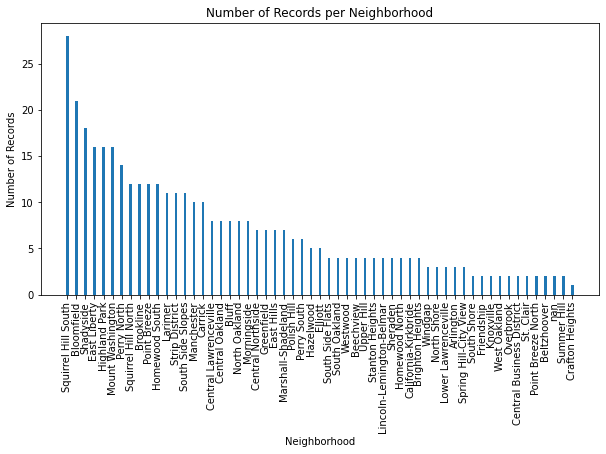

In [33]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

width = 0.5
ax.bar(range(0,len(top_neighborhood_counts)), top_neighborhood_counts, width=width/2)
ax.set_xticks(range(0,len(top_neighborhood_counts)))
ax.set_xticklabels(top_neighborhood_names)

plt.xticks(rotation=90)
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Number of Records')
ax.set_title('Number of Records per Neighborhood')

#### Conclusion:
Squirel Hill South is the neighborhood with the most amount of traffic, which brings additional people to the neigborhood, and we know, more people, more pigeons.

## Metric 3: Number of Public Wifi Locations in the neighborhoods
#### Jason Zukiewicz - Jaz88

Why do we need Public Wifi? Because, pigeons are not real. They are Government Surveillance Drones. They need Wi-Fi to be online and report back to NSA. The datasets used:
* Wi-Fi Locations
* Zip Code Boundaries

In [37]:
![image.png](attachment:image.png)

/bin/bash: -c: line 0: syntax error near unexpected token `drone.jpg'
/bin/bash: -c: line 0: `[drone](drone.jpg)'


Importing libraries and datasets.

In [38]:
import pandas as pd
wifi = pd.read_csv("pub-wifi.csv",low_memory=False)
zip = pd.read_csv("zip.csv",low_memory=False)
pitt_zip = pd.read_csv("pitt_zip.csv",low_memory=False)

The wifi files is missing a few neighborhhod names. I neede to sue the Zip Code Boundaries metric to match these. Firdt, i created a zip dictionary.

In [39]:
zip_dict = {}
for index, row in zip.iterrows():
    number = row['zip']
    name = row['name']
    zip_dict[number] = name

Next, added the missing names to the dictionary.

In [40]:
for index, row in pitt_zip.iterrows():
    number = row['Zip'] 
    name = row['Name']
    zip_dict[number] = name

Finally, created a dictionary of zipcodes and their associated count.

In [41]:
wifi_count = {}
for index, row in wifi.iterrows():
    try:
        zip = int(row['zip'])
        # Get Name from Zip
        name = zip_dict[zip]
    
        if name is not None:
            if name not in wifi_count:
                wifi_count[name] = 1
            else:
                wifi_count[name] += 1   
    except:
        pass # Some entries have no zipcode

In [ ]:
The output:

sorted = {k:v for k,v in sorted(wifi_count.items(), key=lambda v:v[1], reverse=True)}
count = 10
for item in sorted.items():
    print(item)
    if count == 0:
        break
    else:
      count -= 1

I used geopandas to add the result on a map.

In [43]:
import geopandas
%matplotlib inline
wifi_count =  {k.lower(): v for k, v in wifi_count.items()}
s = pd.Series(wifi_count, name='count')
s.index.name = 'neighborhood'
s.reset_index()

,neighborhood,count
0,allegheny,2
1,south hills,4
2,brookline,4
3,pittsburgh,47
4,oakland,5
5,squirrel hill,3
6,wabash,2
7,natrona heights,1
8,carnegie,2
9,bethel park,1


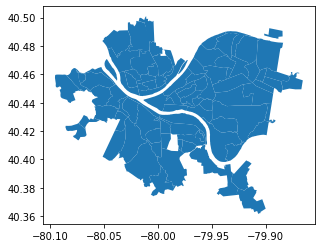

In [45]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods['hood'] = neighborhoods['hood'].str.lower()
neighborhoods.plot() # plot the geopandas dataframe

In [46]:
# do the merge
count_map = neighborhoods.merge(s, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
count_map[['hood','count','geometry']].head()
# There seems to be an issue with the merge
# I can see that my data has only Oakland while the map has central, north, and west this is part of the issue

,hood,count,geometry
0,central oakland,NaN,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,north oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,west oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,crawford-roberts,NaN,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,strip district,NaN,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


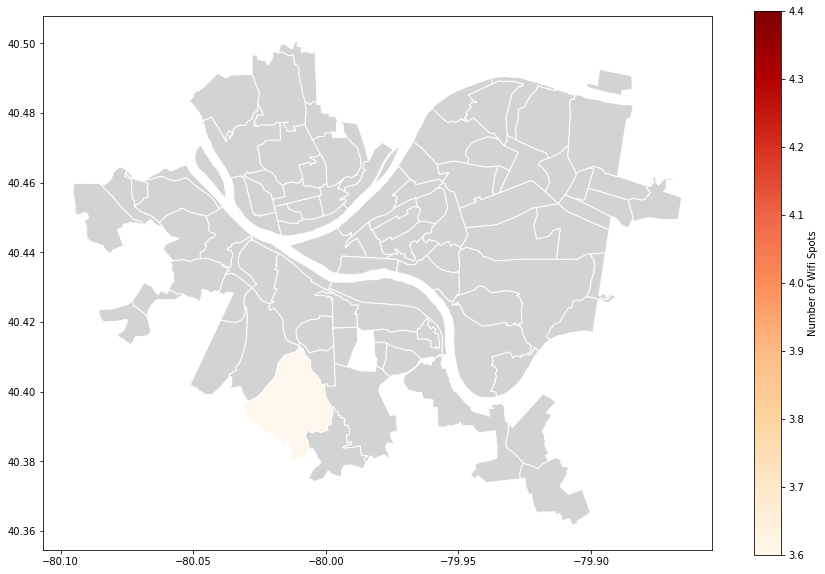

In [47]:
count_map.plot(column='count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Wifi Spots"}, # label the legend
               figsize=(15, 10),         # set the  size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

#### Conclusion:

The city has the most wifi spots. This data is probably skewed because of the zip code translation, a lot of zip codes are generalized to pittsburgh. However, I feel Confident that there are also a lot of buisnesses and institutes that have wifi.

I am suprirsed by Braddock also having many spots, compared to all other neighborhoods being so low.
I dont know that area so I cant make any assumtions about it.

### Final Conclusion

If pigeons are real, the best neighborhood for them to live in is definitely Squirrel Hill South. Its the biggest, its the most populous and has the most traffic. 

If pigeons are not real, Squirrel Hill South is stilla  good option, there a lot of people to survey and lots of trres to hide. They might jsut need to fly over to Downtown to upload the data.